In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/'

Mounted at /content/drive/
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets


In [2]:
import torch
import matplotlib.pyplot as plt

In [3]:
import os
data_path1='/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/'
if not os.path.isdir(data_path1+"/data_temp/"):
    os.mkdir(data_path1+"/data_temp/")

### Datasets in Torchvision

Built-in datasets

### Download and Save MNIST

In [4]:
import torchvision
data_train = torchvision.datasets.MNIST('data_temp/mnist_data1', train=True, download=True)

### Hoặc dùng import, các lệnh trên tương đương

In [5]:
from torchvision.datasets import MNIST
data_train = MNIST('data_temp/mnist_data2', train=True, download=True)

In [6]:
from torchvision.datasets import MNIST
from torchvision import datasets, transforms
data_train = MNIST('~/mnist_data', train=True, download=True, transform=transforms.ToTensor()) # Chuyển sang Tensor để xử lí tiếp

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/mnist_data/MNIST/raw



In [7]:
train_data=torch.Tensor(60000,28,28)
train_label=torch.LongTensor(60000)
for idx, example in enumerate(data_train):
    train_data[idx]=example[0]
    train_label[idx]=example[1]
#torch.save(train_data, 'train_data.pt')
#torch.save(train_label, 'train_label.pt')
data_path='/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/'
torch.save(train_data,data_path+ 'mnist_train_data.pt')
torch.save(train_label,data_path+ 'mnist_train_data.pt')

### Looking at the MNIST Dataset in-Depth

Pytorch's torchvision repository hosts a handful of standard datasets, MNIST being one of the most popular. Now we'll see how Pytorch loads the MNIST dataset from the pytorch/vision repository. Let's first download the dataset and load it in a variable named data_train. Then we'll print a sample image

image label is:  0


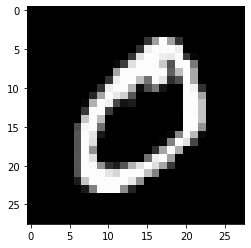

In [8]:
import matplotlib.pyplot as plt
random_image = data_train[1][0] #data_train[0]:image,data_train[1]:label
random_image_label=data_train[1][1]
# Print the image using Matplotlib
#plt.imshow(random_image, cmap='gray') => error do mình đang để ở Tensor
plt.imshow(random_image[0,:,:], cmap='gray') # Hoặc có thể bỏ "transforms" ở trên đi
print("image label is: ", random_image_label)


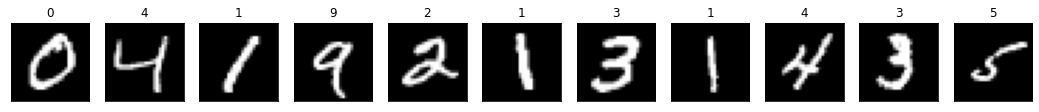

In [9]:
import numpy as np
plt.figure(figsize=(20,5))
for idx in range(1,12):
    plt.subplot(1,12,idx).imshow(data_train[idx][0][0,:,:], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(data_train[idx][1])

Tương tự, có thể dùng với tập CIFAR10: \\
torchvision.datasets.CIFAR10()

### ImageFolder Class

ImageFolder Class is a generic data loader class in torchvision that helps you load your own image dataset. Let's imageine you are working on a classification problem and building a neural network to identify if a given image is an apple or an orange. To do this in PyTorch, the first step is to arrange images in a default folder

  Đầu tiên chuẩn bị dữ liệu gồm 2 lớp

In [10]:
data_tuto1_root = '/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/'
import pathlib

root=pathlib.Path(data_tuto1_root)
print(root)
for p in root.iterdir():
  print(p)

/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/orange
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/apple


In [11]:
data=pathlib.Path(data_tuto1_root+'apple')
for p in data.iterdir():
  print(p)

/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/apple/apple_1.jpg
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/apple/apple_2.jpg
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/apple/apple_3.jpg
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/apple/apple_4.jpg
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/apple/apple_5.jpg


In [12]:
data=pathlib.Path(data_tuto1_root+'orange')
for p in data.iterdir():
  print(p)

/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/orange/orange_1.jpg
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/orange/orange_2.jpg
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/orange/orange_3.jpg
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/orange/orange_4.jpg
/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/Data_tuto1/orange/orange_5.jpg


Đọc dữ liệu đã chuẩn bị với dạng thức torchvision.datasets

image label is:  0


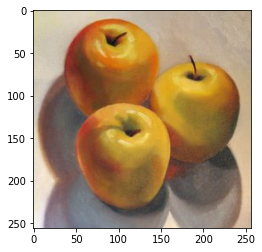

In [13]:
data_train = torchvision.datasets.ImageFolder(data_tuto1_root)
random_image = data_train[2][0]
random_image_label = data_train[2][1]
plt.imshow(random_image)
print("image label is: ", random_image_label)

image label is:  1


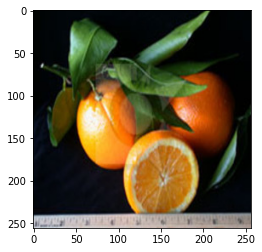

In [14]:
random_image = data_train[7][0]
random_image_label = data_train[7][1]
plt.imshow(random_image)
print("image label is: ", random_image_label)

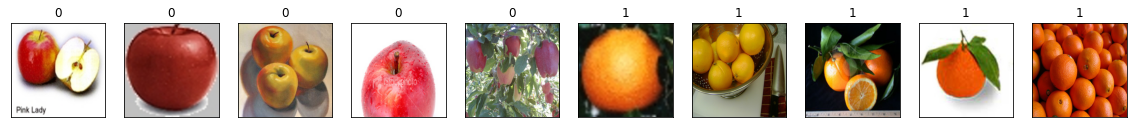

In [15]:
plt.figure(figsize=(20,5))
for idx in range(1,11):
  plt.subplot(1,10,idx).imshow(data_train[idx-1][0])
  plt.xticks([])
  plt.yticks([])
  plt.title(data_train[idx-1][1])

### Data Loading in PyTorch

Data loading in one of the first steps in **building a Deep Learning pipeline**, or training a model. This task becomes more challenging when the complexity of the data increases. In this section, we will learn about the DataLoader class in PyTorch that helps us to load and iterate over elements in a dataset. This class is avaiable as DataLoader in the **torch.utils.data** module. DataLoader can be imported as follows:

In [16]:
from torch.utils.data import DataLoader

Let's now discuss in detail the parameters that the DataLoader class accepts, shown below

In [17]:
#import MNISt
from torchvision.datasets import MNIST
dataset=MNIST

In [18]:
from torch.utils.data import DataLoader
DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    num_workers=0,
    collate_fn=None,
    pin_memory=False,
)

### Looking at the MNIST Dataset in-Depth

PyTorch's torchvision repository hosts a handful of standard datasets, MNIST being one of the most popular. Now we'll see how PyTorch loads the MNIST dataset from the pytorch/vision repository. Let's first download the dataset and load it in a variable named data_train. Then we'll print a sample image

In [19]:
# Import MNIST
from torchvision.datasets import MNIST
# Download and Save MNIST
data_train = MNIST('~/mnist_data', train=True, download=True)
# Print data
print(data_train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: /root/mnist_data
    Split: Train


image label is:  3


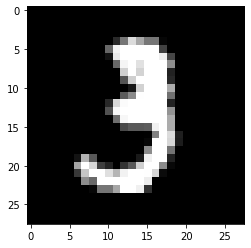

In [20]:
# import matplotlib.pyplot as plt
random_image = data_train[10][0] #data_train[0]:image,data_train[1]:label
random_image_label=data_train[10][1]
# Print the image using Matplotlib
# plt.imshow(random_image, cmap='gray') => error do mình đang để ở Tensor
plt.imshow(random_image, cmap='gray') # Hoặc có thể bỏ "transforms" ở trên đi
print("image label is: ", random_image_label)


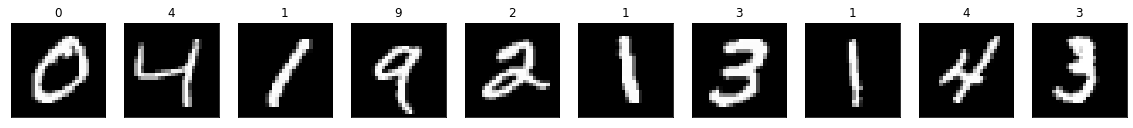

In [21]:
plt.figure(figsize=(20,5))
for idx in range(1,11):
  plt.subplot(1,10,idx).imshow(data_train[idx][0], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(data_train[idx][1])

In [22]:
print(len(data_train))

60000


### Chuẩn bị dữ liệu cho huấn luyện mô hình

Most of the time you wouldn't be accessing images with indices, but rather sending matrices containing the images to your model. This comes in handy when you need to prepare data batches (and perhaps, shuffle them before every run). Now let's see how this works in real-time. Let's use the DataLoader class to load the dataset, as shown below

Có thể gộp Dataset vào DataLoader

In [23]:
import torch
from torchvision import transforms
data_train_batch_1 = torch.utils.data.DataLoader(
    MNIST(
        '~/mnist_data', train=True, download=True,
        transform= transforms.Compose([transforms.ToTensor()])),
        batch_size = 64,
        shuffle = True
        )


In [24]:
print(len(data_train_batch_1))

938


Hoặc tách riêng:

In [25]:
data_train = MNIST('~/mnist_data', train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))
data_train_batch_2 = torch.utils.data.DataLoader(data_train, batch_size=200, shuffle=True)

In [26]:
print(len(data_train))
print(len(data_train_batch_2))

60000
300


In [27]:
data_train_batch_2 = torch.utils.data.DataLoader(data_train, batch_size=64, shuffle=True) # batch_size thường lấy 2^n

In [28]:
print(len(data_train))
print(len(data_train_batch_2))

60000
938


In [29]:
from torch.autograd import Variable
#from torchvision import transforms
for i, (images,labels) in enumerate(data_train_batch_2):
  images= Variable(images)
  labels= Variable(labels)

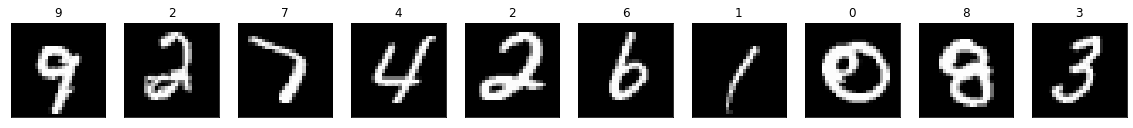

In [30]:
plt.figure(figsize=(20,5))
for idx in range(1,11):
  plt.subplot(1,10,idx).imshow(images[idx].squeeze(), cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(labels[idx].numpy())

Nếu không có .numpy() ở dòng cuối?

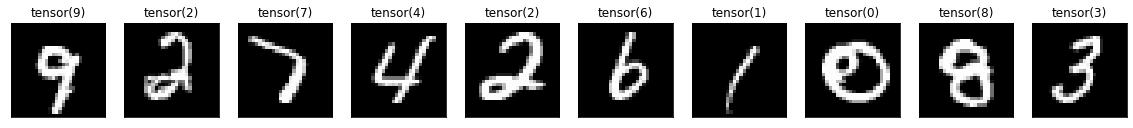

In [31]:
plt.figure(figsize=(20,5))
for idx in range(1,11):
  plt.subplot(1,10,idx).imshow(images[idx].squeeze(), cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(labels[idx])

### CIFAR10

### Download CIFAR10

In [39]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [40]:
data_train_cifar10 = datasets.CIFAR10(root="~/cifar10_data", train=True, transform = transforms.ToTensor(), download=True)
data_test_cifar10 = datasets.CIFAR10(root="~/cifar10_data", train=False, transform = transforms.ToTensor(), download= True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/cifar10_data/cifar-10-python.tar.gz to /root/cifar10_data
Files already downloaded and verified


### Check again

In [41]:
print('data_train_cifar10 length is', len(data_train_cifar10))
print('data_test_cifar10 length is', len(data_test_cifar10))

data_train_cifar10 length is 50000
data_test_cifar10 length is 10000


In [42]:
image, label = data_train_cifar10[0]
print(image.shape)
print(label)

torch.Size([3, 32, 32])
6


### Show Images

image label is:  truck


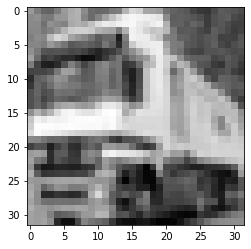

In [43]:
import matplotlib.pyplot as plt
mapping = {0:"airplane",1:"automobile",2:"bird",3:"cat ",4:"deer ",5:"dog ",6:"frog",7:"horse",8:"ship",9:"truck"}
random_image = data_train_cifar10[1][0]
random_image_label=data_train_cifar10[1][1]
plt.imshow(random_image[0,:,:], cmap='gray')
print("image label is: ", mapping[random_image_label])

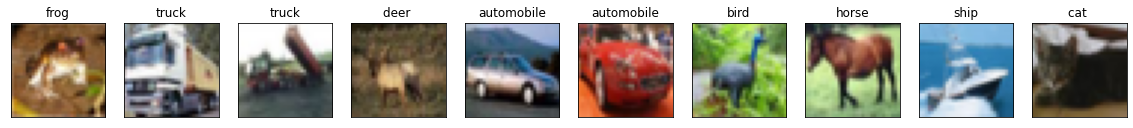

In [44]:
plt.figure(figsize=(20,5))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.imshow(data_train_cifar10[i-1][0].permute(1,2,0))
  plt.xticks([]),plt.yticks([])
  plt.title(mapping[data_train_cifar10[i-1][1]])

### Save CIFAR10

### Save thành định dạng .pt

In [45]:
from tqdm import tqdm
dataset_cifar10 = {"data_train_cifar10": data_train_cifar10, "data_test_cifar10": data_test_cifar10}
dataset_cifar10_save = {"train_image": torch.zeros(50000,3,32,32), "train_labels": torch.zeros(50000).long(),\
                 "test_image": torch.zeros(10000,3,32,32), "test_labels": torch.zeros(10000).long()}
for phase in ['train', 'test']:
  with tqdm(total=len(dataset_cifar10["data_"+phase + "_cifar10"])) as pbar:
    for idx, sample in enumerate(dataset_cifar10["data_"+phase + "_cifar10"]):
      dataset_cifar10_save[phase + "_image"][idx] = sample[0]
      dataset_cifar10_save[phase + "_labels"][idx] = sample[1]
      pbar.update(1)
      pbar.set_description(f"[{phase}] idx: {idx}")

data_path='/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/'
torch.save(dataset_cifar10_save,data_path+'cifar10_dataset.pt')

[test] idx: 9999: 100%|██████████| 10000/10000 [00:31<00:00, 319.72it/s]


In [46]:
#load data
dataset_cifar10_load = torch.load('/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/cifar10_dataset.pt')
print('length images train',len(dataset_cifar10_load['train_image']))
print('length labels train',len(dataset_cifar10_load['train_labels']))
print('length images test',len(dataset_cifar10_load['test_image']))
print('length labels test',len(dataset_cifar10_load['test_labels']))

length images train 50000
length labels train 50000
length images test 10000
length labels test 10000


### Save thành định dạng .csv

In [47]:
data_train_cifar10 = datasets.CIFAR10(root="~/cifar10_data", train=True, download=True)
data_test_cifar10 = datasets.CIFAR10(root="~/cifar10_data", train=False, download= True)

Files already downloaded and verified
Files already downloaded and verified


In [48]:
import pandas as pd
dataset_cifar10 = {"data_train_cifar10": data_train_cifar10, "data_test_cifar10": data_test_cifar10}
dataset_cifar10_save = {"image": [], "label": [], "phase": []}
for phase in ['train', 'test']:
  with tqdm(total=len(dataset_cifar10["data_"+ phase + "_cifar10"])) as pbar:
    for idx, sample in enumerate(dataset_cifar10["data_"+phase + "_cifar10"]):
      dataset_cifar10_save["image"].append(np.array(sample[0]).reshape(-1).tolist())
      dataset_cifar10_save["label"].append(sample[1])
      dataset_cifar10_save["phase"].append(phase)
      pbar.update(1)
      pbar.set_description(f"[{phase}] idx: {idx}")
myFrame = pd.DataFrame(dataset_cifar10_save)
data_path='/content/drive/MyDrive/ColabNotebooks/Lec1_Tuto1_datasets/'
myFrame.to_csv(data_path + 'dataset_cifar10_save_csv.csv')

[test] idx: 9999: 100%|██████████| 10000/10000 [00:28<00:00, 355.71it/s]


In [49]:
# load dataset
df = pd.read_csv(data_path + 'dataset_cifar10_save_csv.csv')
df.head(5)

,Unnamed: 0,image,label,phase
0,0,"[59, 62, 63, 43, 46, 45, 50, 48, 43, 68, 54, 4...",6,train
1,1,"[154, 177, 187, 126, 137, 136, 105, 104, 95, 1...",9,train
2,2,"[255, 255, 255, 253, 253, 253, 253, 253, 253, ...",9,train
3,3,"[28, 25, 10, 37, 34, 19, 38, 35, 20, 42, 37, 2...",4,train
4,4,"[170, 180, 198, 168, 178, 196, 177, 185, 203, ...",1,train


End.